In [ ]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

import os
from share.helper_functions import(
    download_if_not_modified_today
)
from share.rogalski_functions import(
    data_voi_df
)
import pandas as pd
from sorcery import dict_of
from share.helper_functions import (
    plot
)
import datetime
import numpy as np
from share.basiw_functions import(
    get_popwoj_df
)

In [ ]:
data_dir = './Rogalski_data'
data_file = 'wojewodztwa.csv'
path = os.sep.join([data_dir,data_file])
download_command='./get_voi.sh'

download_if_not_modified_today(path, download_command)
df = pd.read_csv(path)

./Rogalski_data/wojewodztwa.csv exists
./Rogalski_data/wojewodztwa.csv was modified today, not downloading


In [ ]:
dfc = data_voi_df(df, 'cases')
dfc

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,1656,775,692,440,801,2018,2413,481,758,267,1075,1857,396,485,1520,812
2022-01-07,1015,484,401,260,483,1687,2147,282,561,118,816,1515,256,267,960,549
2022-01-08,935,583,436,267,666,1394,1621,320,540,201,667,996,287,393,967,509
2022-01-09,927,390,468,252,590,1469,1820,249,508,212,887,1262,279,246,912,526


In [ ]:
dfd = data_voi_df(df, 'deaths')
dfd

,Dolnośląskie,Kujawsko-Pomorskie,Lubelskie,Lubuskie,Łódzkie,Małopolskie,Mazowieckie,Opolskie,Podkarpackie,Podlaskie,Pomorskie,Śląskie,Świętokrzyskie,Warmińsko-Mazurskie,Wielkopolskie,Zachodniopomorskie
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,33,36,25,50,44,70,50,29,57,9,17,74,24,14,74,40
2022-01-07,0,1,0,15,2,10,46,1,4,3,9,17,2,0,0,7
2022-01-08,2,25,13,11,18,23,16,7,30,4,30,40,15,10,38,10
2022-01-09,0,0,0,2,0,0,9,0,0,0,5,0,0,1,0,5


In [ ]:
dfpopwoj  = get_popwoj_df()
dfpopwoj = dfpopwoj[['Ludność']]

# dfpopwoj

popwojdict = dfpopwoj.to_dict()['Ludność']
# popwojdict['Małopolskie']


dfc_per1e6 = pd.DataFrame()

for voi in dfc.columns:
    dfc_per1e6[voi] = 1e6*dfc[voi]/popwojdict[voi]

# dfc_per1e6

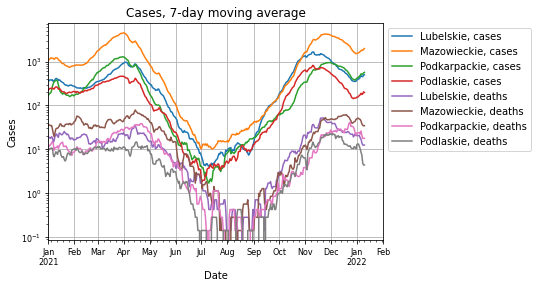

In [ ]:
voivodships = ['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[dfq, dfp],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date(2022,2,1)),
    legendlabels = legendlabels,
    logy = True
    )

plot(**plotopts);


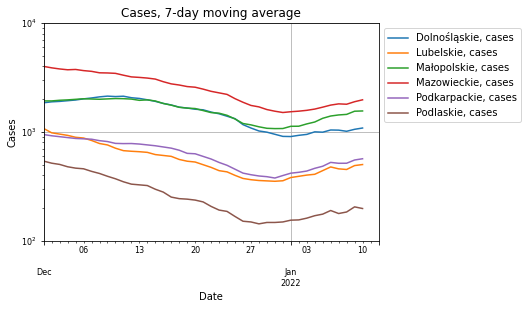

In [ ]:
voivodships = [
    'Dolnośląskie',	# rośnie
    # 'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    # 'Lubuskie', 	# nie rośnie
    # 'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    # 'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    # 'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    # 'Świętokrzyskie',	# rośnie mało
    # 'Warmińsko-Mazurskie',	# rośnie mało
    # 'Wielkopolskie',	# nie rośnie
    # 'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = True
    )

plot(**plotopts);

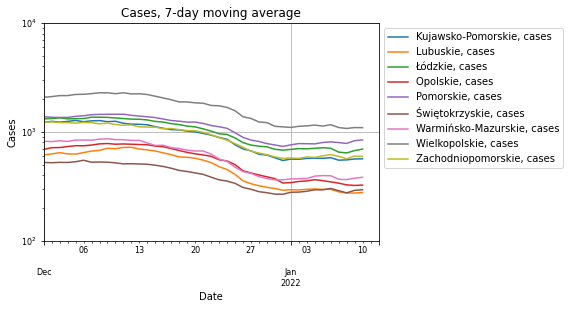

In [ ]:
voivodships = [
    # 'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    # 'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    # 'Małopolskie',	# rośnie
    # 'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    # 'Podkarpackie',	# rośnie
    # 'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = [voi + ', cases' for voi in voivodships]
legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc[voivodships].rolling(7).mean()
dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = True
    )

plot(**plotopts);

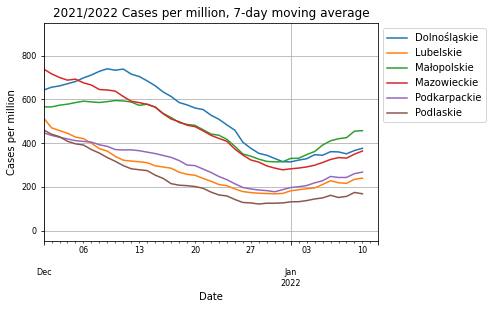

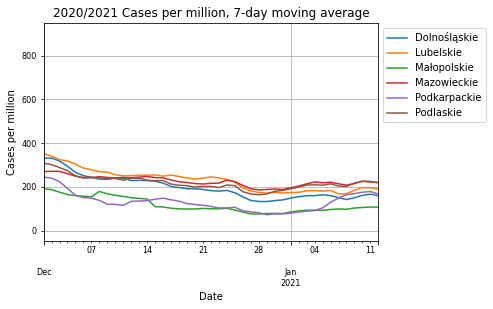

In [ ]:
voivodships = [
    'Dolnośląskie',	# rośnie
    # 'Kujawsko-Pomorskie', # nie rośnie	
    'Lubelskie',	# rośnie
    # 'Lubuskie', 	# nie rośnie
    # 'Łódzkie', # nie rośnie
    'Małopolskie',	# rośnie
    'Mazowieckie',	# rośnie
    # 'Opolskie',	# nie rośnie
    'Podkarpackie',	# rośnie
    'Podlaskie',	# rośnie
    # 'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    # 'Świętokrzyskie',	# rośnie mało
    # 'Warmińsko-Mazurskie',	# rośnie mało
    # 'Wielkopolskie',	# nie rośnie
    # 'Zachodniopomorskie' # rośnie mało
    ]

legendlabels_cases = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc_per1e6[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2020/2021 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2020,12,1), datetime.date(2021,1,12)),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

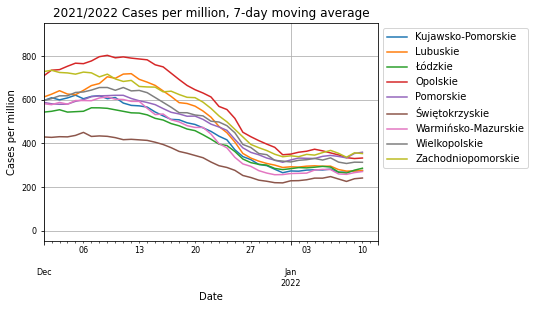

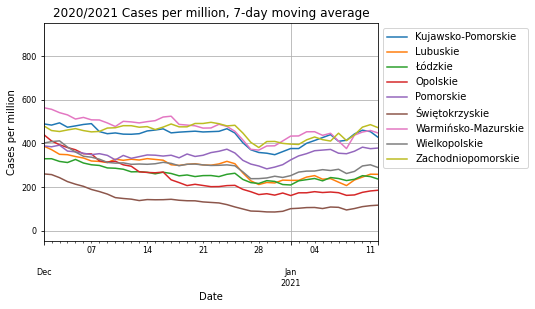

In [ ]:
voivodships = [
    # 'Dolnośląskie',	# rośnie
    'Kujawsko-Pomorskie', # nie rośnie	
    # 'Lubelskie',	# rośnie
    'Lubuskie', 	# nie rośnie
    'Łódzkie', # nie rośnie
    # 'Małopolskie',	# rośnie
    # 'Mazowieckie',	# rośnie
    'Opolskie',	# nie rośnie
    # 'Podkarpackie',	# rośnie
    # 'Podlaskie',	# rośnie
    'Pomorskie', # rośnie mało
    # 'Śląskie',	#nie rośnie
    'Świętokrzyskie',	# rośnie mało
    'Warmińsko-Mazurskie',	# rośnie mało
    'Wielkopolskie',	# nie rośnie
    'Zachodniopomorskie' # rośnie mało
    ]


legendlabels_cases = voivodships
# legendlabels_cases = [voi + ', cases' for voi in voivodships]
# legendlabels_deaths = [voi + ', deaths' for voi in voivodships]
# legendlabels = legendlabels_cases + legendlabels_deaths


dfq=dfc_per1e6[voivodships].rolling(7).mean()
# dfp=dfd[voivodships].rolling(7).mean()

# display(dfq)

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2021/2022 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

plotopts = dict_of(
    plotdfs=[
        dfq,
        # dfp
     ],
    xlabel = 'Date',
    ylabel = 'Cases per million',
    title = f'2020/2021 Cases per million, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2020,12,1), datetime.date(2021,1,12)), #(datetime.date(2021,12,1), datetime.date.today()),
    # ylim = (100,10000),
    legendlabels = legendlabels_cases, #legendlabels,
    logy = False
    )

plot(**plotopts);

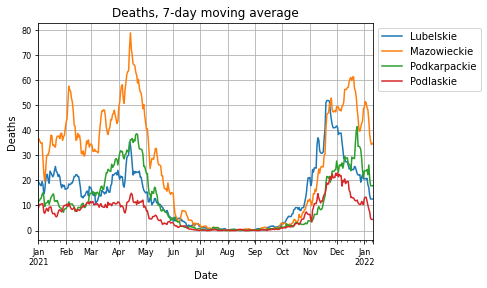

In [ ]:
plotopts = dict_of(
    plotdfs=[dfp],
    xlabel = 'Date',
    ylabel = 'Deaths',
    title = f'Deaths, 7-day moving average',
    fontsize = 8,
    xlim = (datetime.date(2021,1,1), datetime.date.today()),
    )

plot(**plotopts);

/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
../share/helper_functions.py:331: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticklist)


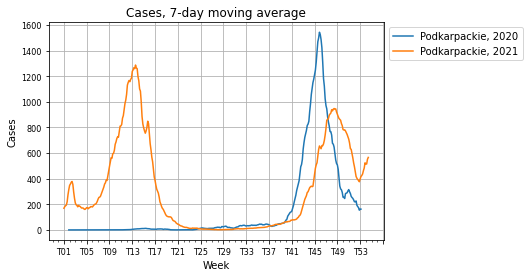

In [26]:
voivodships = ['Podkarpackie']
dfq=dfc[voivodships].rolling(7).mean()

dfq2020 =dfq[dfq.index <  pd.to_datetime(datetime.date(2021,1,1))].copy(deep = True)
dfq2021 = dfq[dfq.index >=  pd.to_datetime(datetime.date(2021,1,1))].copy(deep=True)

dfq2020['Week'] = dfq2020.index.strftime('T%V')
dfq2021['Week'] = dfq2021.index.strftime('T%V')


legendlabels_2020 = [voi + ', 2020' for voi in voivodships]
legendlabels_2021 = [voi + ', 2021' for voi in voivodships]
legendlabels = legendlabels_2020 + legendlabels_2021

plotopts = dict_of(
    plotdfs=[dfq2020, dfq2021],
    x = 'Week',
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    legendlabels = legendlabels
    )

plot(**plotopts);

## Add new line for 2022!
